## ÏßÄÎèÑÌïôÏäµ(ÌöåÍ∑Ä)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [17]:
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
from sklearn.datasets import load_diabetes # ÎãπÎá®Î≥ë ÌôòÏûê Îç∞Ïù¥ÌÑ∞

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [13]:
# train sample
X_train.head(3)

age       sex       bmi        bp        s1        s2        s3  \
74  0.012648  0.050680  0.002417  0.056301  0.027326  0.017162  0.041277   
26 -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
45  0.027178  0.050680 -0.035307  0.032201 -0.011201  0.001504 -0.010266   

          s4        s5        s6  
74 -0.039493  0.003709  0.073480  
26 -0.076395 -0.042571 -0.005220  
45 -0.002592 -0.014960 -0.050783

In [14]:
# target sample
y_train.head()

74      85.0
26     137.0
45      53.0
389     51.0
154    197.0
Name: target, dtype: float64

<Axes: >

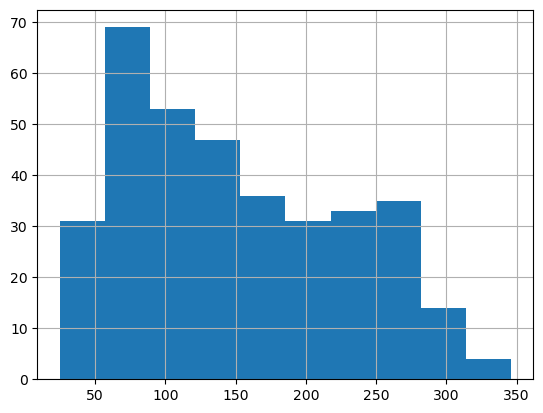

In [15]:
# target check
# ÎãπÎá®Î≥Ñ ÏßÑÌñâÎ•†(target)
y_train.hist()

50~100 ÏÇ¨Ïù¥Í∞Ä Í∞ÄÏû• ÎßéÍ≥†, xÏ∂ï Í∞íÏù¥ Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº Í∑∏ ÏàòÏπòÎäî Ï†êÏ†ê ÏûëÏïÑÏßÑÎã§.

## ÏÑ†Ìòï ÌöåÍ∑Ä

In [18]:
# ÏÑ†Ìòï ÌöåÍ∑Ä
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

2707.6318521641583

## Î¶øÏßÄ ÌöåÍ∑Ä

In [33]:
# Î¶øÏßÄ ÌöåÍ∑Ä
from sklearn.linear_model import Ridge
model = Ridge() # default alpha=1 Ïù¥Í≤ÉÏúºÎ°ú Í∑úÏ†úÎ•º Ï°∞Ï†ïÌï† Ïàò ÏûàÎã§.
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

3522.1191842072662

Í∑úÏ†úÍ∞Ä ÏûàÎäî Î¶øÏßÄ ÌöåÍ∑ÄÏûÑÏóêÎèÑ Ïò§Ï∞®Í∞Ä Îçî ÌÅ¨Îã§.  
Ïò§Ï∞®Í∞Ä Îçî ÌÅ¨ÎØÄÎ°ú Îçî Ï¢ãÏßÄ Î™ªÌïú Î™®Îç∏Ïù¥ ÎêúÎã§.

In [34]:
# ÌöåÍ∑Ä Í≥ÑÏàò
# Ï∂úÎ†•ÎêòÎäî Í∞íÎì§ÏùÄ ÌîºÏ≤òÎì§Ïùò ÏàúÏÑúÎã§. (age, sex..Ïùò ÌöåÍ∑Ä Í≥ÑÏàò)
model.coef_

array([  31.2934206 ,  -71.44865465,  267.60596214,  197.36249197,
         14.61325736,  -13.88423665, -124.64983613,  106.21296724,
        221.0684933 ,  101.20254637])

Ïñ¥Îñ§ Î≥ÄÏàòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÏù∏ÏßÄ ÌåêÎã®ÌïòÍ∏∞ Ïñ¥Î†§Ïö∞ÎØÄÎ°ú dataframeÏúºÎ°ú Î≥ÄÍ≤ΩÌïúÎã§.

In [35]:
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])

alpha1
age   31.293421
sex  -71.448655
bmi  267.605962
bp   197.362492
s1    14.613257
s2   -13.884237
s3  -124.649836
s4   106.212967
s5   221.068493
s6   101.202546

In [36]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

alpha1
age   31.293421
sex  -71.448655
bmi  267.605962
bp   197.362492
s1    14.613257
s2   -13.884237
s3  -124.649836
s4   106.212967
s5   221.068493
s6   101.202546

In [37]:
# Î¶øÏßÄ ÌöåÍ∑Ä alpha=10ÏúºÎ°ú Ï°∞Ï†ï
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

5521.884843903383

In [39]:
coef['alpha10'] = model.coef_
coef

alpha1    alpha10
age   31.293421  16.703166
sex  -71.448655  -1.796418
bmi  267.605962  61.026376
bp   197.362492  47.434846
s1    14.613257  18.491238
s2   -13.884237  13.440104
s3  -124.649836 -35.542087
s4   106.212967  38.896140
s5   221.068493  55.276290
s6   101.202546  35.868345

In [40]:
# Î¶øÏßÄ ÌöåÍ∑Ä alpha=0.1Î°ú Ï°∞Ï†ï
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

2744.9026742146693

In [41]:
coef['alpha0.1'] = model.coef_
coef

alpha1    alpha10    alpha0.1
age   31.293421  16.703166    4.275162
sex  -71.448655  -1.796418 -205.210484
bmi  267.605962  61.026376  450.909749
bp   197.362492  47.434846  331.923682
s1    14.613257  18.491238  -84.311149
s2   -13.884237  13.440104  -54.662514
s3  -124.649836 -35.542087 -158.706512
s4   106.212967  38.896140  114.066890
s5   221.068493  55.276290  391.231834
s6   101.202546  35.868345   78.555458

In [42]:
# Î¶øÏßÄ ÌöåÍ∑Ä alpha=0.05Î°ú Ï°∞Ï†ï
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

2699.6595785438312

In [43]:
coef['alpha0.05'] = model.coef_
coef

alpha1    alpha10    alpha0.1   alpha0.05
age   31.293421  16.703166    4.275162   -0.508850
sex  -71.448655  -1.796418 -205.210484 -223.345659
bmi  267.605962  61.026376  450.909749  469.447848
bp   197.362492  47.434846  331.923682  348.368885
s1    14.613257  18.491238  -84.311149 -146.952481
s2   -13.884237  13.440104  -54.662514  -18.297550
s3  -124.649836 -35.542087 -158.706512 -141.658486
s4   106.212967  38.896140  114.066890  115.860926
s5   221.068493  55.276290  391.231834  432.508101
s6   101.202546  35.868345   78.555458   69.578796

## ÎùºÏèò ÌöåÍ∑Ä

In [45]:
# ÎùºÏèò ÌöåÍ∑Ä
from sklearn.linear_model import Lasso
model = Lasso() # default alpha 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

4179.152642946345

In [47]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef
# Ï§ëÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêòÎäî ÌîºÏ≤òÎßå ÎÇ®Í≤®ÎëêÍ≥† ÎÇòÎ®∏ÏßÄÎäî 0ÏúºÎ°ú ÎßåÎì†Îã§.

alpha1
age    0.000000
sex   -0.000000
bmi  343.589790
bp    46.369923
s1     0.000000
s2     0.000000
s3    -0.000000
s4     0.000000
s5   245.170617
s6     0.000000

In [48]:
# ÎùºÏèò ÌöåÍ∑Ä alpha2
from sklearn.linear_model import Lasso
model = Lasso(alpha=2) 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

6398.637179449031

In [49]:
coef['alpha2'] = model.coef_
coef

alpha1     alpha2
age    0.000000   0.000000
sex   -0.000000   0.000000
bmi  343.589790  42.963888
bp    46.369923   0.000000
s1     0.000000   0.000000
s2     0.000000   0.000000
s3    -0.000000  -0.000000
s4     0.000000   0.000000
s5   245.170617   0.000000
s6     0.000000   0.000000

alpha2Í∞Ä ÎêòÎ©¥ bmiÏ†úÏô∏ÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî 0ÏúºÎ°ú ÎßåÎì†Îã§.

In [50]:
# ÎùºÏèò ÌöåÍ∑Ä alpha=0.05
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.05) 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

2703.4583679188177

In [52]:
coef['alpha0.05'] = model.coef_
coef

alpha1      alpha2   alpha0.05
age    0.000000   -0.000000   -0.000000
sex   -0.000000 -198.948213 -198.948213
bmi  343.589790  487.198584  487.198584
bp    46.369923  340.490360  340.490360
s1     0.000000  -95.576361  -95.576361
s2     0.000000   -0.000000   -0.000000
s3    -0.000000 -189.867452 -189.867452
s4     0.000000   10.487703   10.487703
s5   245.170617  457.332197  457.332197
s6     0.000000   39.292925   39.292925

Î¶øÏßÄÎäî L2 Í∑úÏ†ú, ÎùºÏèòÎäî L1 Í∑úÏ†úÎ•º ÌÜµÌï¥ÏÑú ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÎßåÎì§Í≤å ÎêúÎã§.

## ÏóòÎùºÏä§Ìã±ÎÑ∑ ÌöåÍ∑Ä

In [54]:
# ÏóòÎùºÏä§Ìã±ÎÑ∑ ÌöåÍ∑Ä
from sklearn.linear_model import ElasticNet
model = ElasticNet() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

6539.270961171604

In [59]:
# ÏóòÎùºÏä§Ìã±ÎÑ∑ ÌöåÍ∑Ä
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6) # default l1_ratio 0.5 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # Ïò§Ï∞®Ïà´ÏûêÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

2675.6031657225317

Í∞ÄÏû• ÏûëÏùÄ Ïò§Ï∞® Í∞íÏùÑ ÎÇ∏ Î™®Îç∏Ïù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.

## ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ & XGBoost

Î∂ÑÎ•òÏóêÏÑúÎøêÎßå ÏïÑÎãàÎùº ÌöåÍ∑ÄÏóêÏÑúÎèÑ ÏÇ¨Ïö©ÎêòÎäî Î™®Îç∏Ïù¥Îã§.

In [69]:
# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3233.3248640449438

In [68]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4265.475533439266

## ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

grid search, random search Î•º Ïù¥Ïö©Ìï¥ÏÑú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÎäî Î∞©Î≤ï  
ÏãúÍ∞ÑÏù¥ ÎßéÎã§Î©¥ grid search, Îπ†Î•¥Í≤å Ìï¥Ïïº ÌïúÎã§Î©¥ random search Ï∂îÏ≤ú

### ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú

In [71]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [74]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [75]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

## Grid Search

In [78]:
# GridSearchCV
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [79]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏùå
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [80]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample =0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3016.599930669008

## Randomized Search

In [81]:
#  Randomized Search
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [82]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏùå
grid.best_params_

{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}

In [83]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 200,
    subsample =0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3218.7105269306708

## ÌèâÍ∞Ä

## üìä ÌöåÍ∑Ä Î™®Îç∏ ÌèâÍ∞ÄÏßÄÌëú (Regression Metrics)

## 1. Mean Absolute Error (MAE)

- **Í≥µÏãù**:  
  MAE = (1/n) * Œ£ |y·µ¢ - ≈∑·µ¢|
- **ÏÑ§Î™Ö**: Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞íÏùò Ï∞®Ïù¥(Ïò§Ï∞®)Î•º Ï†àÎåìÍ∞íÏúºÎ°ú Í≥ÑÏÇ∞Ìïú ÌèâÍ∑†
- **ÌäπÏßï**: Ïù¥ÏÉÅÏπòÏóê Îçú ÎØºÍ∞êÌï®
- **Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå**

---

## 2. Mean Squared Error (MSE)

- **Í≥µÏãù**:  
  MSE = (1/n) * Œ£ (y·µ¢ - ≈∑·µ¢)¬≤
- **ÏÑ§Î™Ö**: Ïò§Ï∞®Î•º Ï†úÍ≥±ÌïòÏó¨ ÌèâÍ∑†ÎÇ∏ Í∞í
- **ÌäπÏßï**: ÌÅ∞ Ïò§Ï∞®Ïóê Îçî ÌÅ∞ Ìå®ÎÑêÌã∞ ‚Üí Ïù¥ÏÉÅÏπòÏóê ÎØºÍ∞ê
- **Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå**

---

## 3. Root Mean Squared Error (RMSE)

- **Í≥µÏãù**:  
  RMSE = ‚àöMSE
- **ÏÑ§Î™Ö**: MSEÏùò Ï†úÍ≥±Í∑º ‚Üí Îã®ÏúÑÎ•º targetÍ≥º ÎßûÏ∂§
- **Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå**

---

## 4. RMSLE (Root Mean Squared Logarithmic Error)

- **Í≥µÏãù**:  
  RMSLE = ‚àö( (1/n) * Œ£ (log(≈∑·µ¢ + 1) - log(y·µ¢ + 1))¬≤ )
- **ÏÑ§Î™Ö**: Ïã§Ï†ú Í∞íÎ≥¥Îã§ ÌÅ∞ ÏòàÏ∏°ÏùÄ ÏûëÏùÄ ÏòàÏ∏°Î≥¥Îã§ Îçú Ìå®ÎÑêÌã∞Î•º Ï§å  
  - Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù ÏòàÏ∏°Ïù¥ Ïã§Ï†úÎ≥¥Îã§ Í≥ºÎèÑÌïòÍ≤å ÌÅ¨Í±∞ÎÇò ÏûëÏïòÎã§Îäî ÏùòÎØ∏  
  - Î°úÍ∑∏Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê **ÎπÑÏú®Ï†Å Ïò§Ï∞®**Ïóê ÎØºÍ∞êÌïòÎ©∞, **0 ÎòêÎäî ÏûëÏùÄ Í∞í** ÏòàÏ∏°Ïóê Í∞ïÍ±¥Ìï®  
- **ÌäπÏßï**:   
  - Ï£ºÎ°ú **Ï†ïÎãµÏù¥ 0 Ïù¥ÏÉÅÏù¥Í≥†, ÏÉÅÎåÄÏ†Å Ïò§Ï∞®Í∞Ä Ï§ëÏöîÌï† Îïå** ÏÇ¨Ïö©  
- **Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå**

---

## 5. R¬≤ Score (Í≤∞Ï†ïÍ≥ÑÏàò)

- **Í≥µÏãù**:  
  R¬≤ = 1 - (Œ£(y·µ¢ - ≈∑·µ¢)¬≤ / Œ£(y·µ¢ - »≥)¬≤)
- **ÏÑ§Î™Ö**: Î™®Îç∏Ïù¥ Ï†ÑÏ≤¥ Î≥ÄÎèôÏÑ± Ï§ë ÏñºÎßàÎÇò ÏÑ§Î™ÖÌñàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÉÑ
- **Í∞íÏùò Î≤îÏúÑ**:  
  - 1.0: ÏôÑÎ≤ΩÌïú ÏòàÏ∏°  
  - 0.0: ÌèâÍ∑† ÏàòÏ§Ä  
  - 0Î≥¥Îã§ ÏûëÏùå: Î¨¥ÏûëÏúÑ ÏòàÏ∏°Î≥¥Îã§ Î™ªÌï®


In [109]:
# MAE
from sklearn.metrics import mean_absolute_error
print(f'MAE: ',mean_absolute_error(y_test, pred))

# MSE
from sklearn.metrics import mean_squared_error
print(f'MSE: ',mean_squared_error(y_test, pred))

# RMSE
import numpy as np
print(f'RMSE: ',np.sqrt(mean_squared_error(y_test, pred)))

# RMSLE
from sklearn.metrics import mean_squared_log_error
print(f'RMSLE: ',np.sqrt(mean_squared_log_error(y_test, pred)))

# R^2
from sklearn.metrics import r2_score
print(f'R^2: ',r2_score(y_test, pred))

MAE:  46.916792151633274
MSE:  3218.7105269306708
RMSE:  56.73368071023306
RMSLE:  0.43239748906910014
R^2:  0.5084076080010445
